# Supervised Learning, Part I

### Import libraries

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [28]:
%matplotlib inline

### Load the digits data

In [2]:
import pandas as pd
labeled_images = pd.read_csv('digits_train.csv')

In [2]:
redfin = pd.read_csv('complete_redfin.csv')

In [3]:
redfin.head()

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,...,patio,hasPool,taxdue,frontFaceDirection,yearRemodled,propertyHistory,schoolserving,walkscore,bikescore,transitscore
0,2018-01-12,Condo/Co-op,960 E 100 S #C3,Salt Lake City,UT,84102.0,220000,2.0,2.0,Salt Lake City; So. Salt Lake,...,NaN,['0'],"['$1,286']",['N'],2000.0,"[('Sold (MLS)', 1515744000000), ('Contingent',...","[('Wasatch School', 'K to 6', 7), ('Bryant Mid...",70.0,76.0,58.0
1,2019-02-16,Condo/Co-op,241 N Vine St #1202W,Salt Lake City,UT,84103.0,400000,2.0,2.0,Salt Lake City: Avenues Area,...,['1'],['1'],"['$2,303']",NaN,NaN,"[('Delisted', 1553497200000), ('Listed', 15504...","[('Washington School', 'Preschool to 6', 5), (...",79.0,68.0,71.0
2,2019-07-05,Single Family Residential,351 E Ramona Ave S,Salt Lake City,UT,84115.0,380500,2.0,1.0,Salt Lake City; So. Salt Lake,...,NaN,NaN,NaN,NaN,NaN,[],[],58.0,83.0,57.0
3,2018-12-17,Single Family Residential,1272 N Catherine St,Salt Lake City,UT,84116.0,260000,3.0,1.0,Salt Lake City; Rose Park,...,NaN,NaN,NaN,NaN,NaN,[],[],45.0,70.0,36.0
4,2019-06-13,Single Family Residential,370 N Chicago St,Salt Lake City,UT,84116.0,325000,3.0,1.0,Salt Lake City; Rose Park,...,['1'],['0'],"['$1,175']",['W'],1988.0,"[('Sold (MLS)', 1560409200000), ('Pending', 15...","[('Jackson School', 'Preschool to 6', 3), ('Br...",53.0,83.0,51.0


In [4]:
redfin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
SOLD DATE             9994 non-null object
PROPERTY TYPE         10000 non-null object
ADDRESS               9945 non-null object
CITY                  10000 non-null object
STATE OR PROVINCE     10000 non-null object
ZIP OR POSTAL CODE    9999 non-null float64
PRICE                 10000 non-null int64
BEDS                  9902 non-null float64
BATHS                 9881 non-null float64
LOCATION              9940 non-null object
SQUARE FEET           9901 non-null float64
LOT SIZE              9627 non-null float64
YEAR BUILT            9901 non-null float64
$/SQUARE FEET         9901 non-null float64
HOA/MONTH             2331 non-null float64
STATUS                9994 non-null object
URL                   10000 non-null object
SOURCE                9994 non-null object
MLS#                  9994 non-null float64
LATITUDE              10000 non-null float64
LONGITUDE        

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth',-1)

In [6]:
redfin.head()

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,STATUS,URL,SOURCE,MLS#,LATITUDE,LONGITUDE,filename,marketingRemark,propertyStyle,garageCap,parkingCap,driveway,roof,patio,hasPool,taxdue,frontFaceDirection,yearRemodled,propertyHistory,schoolserving,walkscore,bikescore,transitscore
0,2018-01-12,Condo/Co-op,960 E 100 S #C3,Salt Lake City,UT,84102.0,220000,2.0,2.0,Salt Lake City; So. Salt Lake,1530.0,435.0,1975.0,144.0,298.0,Sold,http://www.redfin.com/UT/Salt-Lake-City/960-E-100-S-84102/unit-C3/home/91734592,WFRMLS,1474840.0,40.766867,-111.863147,0,"10-18-17 NEW PRICE! Highly Sought After First Street Condo. New Carpet, Paint, BRAND NEW Furnace, Newer Water Heater, and Appliances. With High Ceilings, Natural Light and Open Concept Floor Plan, This Condo Feels Much Bigger Than 1,530 Sq Feet. You Will Love The Huge Master Bedroom, Master Bath, 2nd Bedroom Is Roomy, All Closet\u0027s Include Custom Shelving. Front Room Opens To Larger Than Average Sized Dining Room And A Large Kitchen With Useable Space and Ample Cabinets and Storage. 1 Designated Parking Stall, and Storage In Basement (Both are C3). Washer/Dryer and Refridgerator Are Negotiable With The Right Offer. Come See This Beautiful Space!",Other/See Remarks,['1'],NaN,['Concrete'],NaN,NaN,['0'],"['$1,286']",['N'],2000.0,"[('Sold (MLS)', 1515744000000), ('Contingent', 1513805509108), ('Relisted', 1511638009709), ('Delisted', 1510992000000), ('Price Changed', 1510676721000), ('Relisted', 1509053309556), ('Contingent', 1508891528222), ('Price Changed', 1508352271000), ('Relisted', 1507127203012), ('Contingent', 1506617897920), ('Price Changed', 1506185306000), ('Price Changed', 1505101036000), ('Listed', 1503356200976), ('Sold (MLS)', 1129273200000), ('Listed', 1122966000000)]","[('Wasatch School', 'K to 6', 7), ('Bryant Middle School', '7 to 8', 3), ('East High School', '9 to 12', 3)]",70.0,76.0,58.0
1,2019-02-16,Condo/Co-op,241 N Vine St #1202W,Salt Lake City,UT,84103.0,400000,2.0,2.0,Salt Lake City: Avenues Area,1422.0,435.0,1976.0,281.0,441.0,Sold,http://www.redfin.com/UT/Salt-Lake-City/241-N-Vine-St-84103/unit-1202W/home/104133218,WFRMLS,1565895.0,40.773979,-111.892594,1,"Views, Views, Views! You can see the entire Salt Lake Valley from Temple Square, to Point of the Mountain, to the Great Salt Lake from the 12th floor vantage point of this rare and sought after corner unit of Zions Summit. You\u0027ll love watching the sunrise and sunset, as well as the holiday fireworks, from the panoramic windows. This luxury condo is just to the north of the Conference Center and within walking distance to Temple Square, City Creek Center, Abravanel Hall, Trax, loads of shopping and dining, and a lot more. You\u0027ll love the 2 bedroom floor plan. The living room features a travertine wall with a cozy fireplace. There\u0027s a steam bath/shower. And the master suite, with a luxurious soaker tub, will give you a lovely, private place to relax. The unit includes a secured garage parking space and caged storage. There\u0027s a game and exercise room, billiards, ping pong, pool, and open deck. A full laundry (not coin operated) is conveniently located on each floor. Secure, restricted entry, is monitored by cameras, with HOA management onsite daily. See HOA notes for LOTS of inclusions! This home is beautifully furnished and ready to move into; all furniture included! Square footage figures are provided as a courtesy estimate only and were obtained from County Records . Buyer is advised to obtain an independent measurement.",Other/See Remarks,['1'],NaN,['Concrete'],['Composition'],['1'],['1'],"['$2,303']",NaN,NaN,"[('Delisted', 1553497200000), ('Listed', 1550476800000), ('Sold (MLS)', 1550304000000), ('Pending', 1547072454038), ('Listed', 1540796400000)]","[('Washington School', 'Preschool to 6', 5), ('Bryant Middle School', '7 to 8', 3), ('West High School', '7 to 12', 5)]",79.0,68.

In [7]:
pd.set_option('max_colwidth',200)

In [8]:
redfin.head()

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,STATUS,URL,SOURCE,MLS#,LATITUDE,LONGITUDE,filename,marketingRemark,propertyStyle,garageCap,parkingCap,driveway,roof,patio,hasPool,taxdue,frontFaceDirection,yearRemodled,propertyHistory,schoolserving,walkscore,bikescore,transitscore
0,2018-01-12,Condo/Co-op,960 E 100 S #C3,Salt Lake City,UT,84102.0,220000,2.0,2.0,Salt Lake City; So. Salt Lake,1530.0,435.0,1975.0,144.0,298.0,Sold,http://www.redfin.com/UT/Salt-Lake-City/960-E-100-S-84102/unit-C3/home/91734592,WFRMLS,1474840.0,40.766867,-111.863147,0,"10-18-17 NEW PRICE! Highly Sought After First Street Condo. New Carpet, Paint, BRAND NEW Furnace, Newer Water Heater, and Appliances. With High Ceilings, Natural Light and Open Concept Floor Plan,...",Other/See Remarks,['1'],NaN,['Concrete'],NaN,NaN,['0'],"['$1,286']",['N'],2000.0,"[('Sold (MLS)', 1515744000000), ('Contingent', 1513805509108), ('Relisted', 1511638009709), ('Delisted', 1510992000000), ('Price Changed', 1510676721000), ('Relisted', 1509053309556), ('Contingent...","[('Wasatch School', 'K to 6', 7), ('Bryant Middle School', '7 to 8', 3), ('East High School', '9 to 12', 3)]",70.0,76.0,58.0
1,2019-02-16,Condo/Co-op,241 N Vine St #1202W,Salt Lake City,UT,84103.0,400000,2.0,2.0,Salt Lake City: Avenues Area,1422.0,435.0,1976.0,281.0,441.0,Sold,http://www.redfin.com/UT/Salt-Lake-City/241-N-Vine-St-84103/unit-1202W/home/104133218,WFRMLS,1565895.0,40.773979,-111.892594,1,"Views, Views, Views! You can see the entire Salt Lake Valley from Temple Square, to Point of the Mountain, to the Great Salt Lake from the 12th floor vantage point of this rare and sought after co...",Other/See Remarks,['1'],NaN,['Concrete'],['Composition'],['1'],['1'],"['$2,303']",NaN,NaN,"[('Delisted', 1553497200000), ('Listed', 1550476800000), ('Sold (MLS)', 1550304000000), ('Pending', 1547072454038), ('Listed', 1540796400000)]","[('Washington School', 'Preschool to 6', 5), ('Bryant Middle School', '7 to 8', 3), ('West High School', '7 to 12', 5)]",79.0,68.0,71.0
2,2019-07-05,Single Family Residential,351 E Ramona Ave S,Salt Lake City,UT,84115.0,380500,2.0,1.0,Salt Lake City; So. Salt Lake,1650.0,4791.0,1921.0,231.0,NaN,Sold,http://www.redfin.com/UT/Salt-Lake-City/351-Ramona-Ave-84115/home/86428538,WFRMLS,1608708.0,40.728251,-111.880916,2,"You are going to love Casa Ramona! A short bike ride away from Sugarhouse Square and Liberty Park, and minutes to downtown, I-80, or I-15 by car, this craftsman bungalow is your perfect Salt Lake...",Bungalow/Cottage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[],58.0,83.0,57.0
3,2018-12-17,Single Family Residential,1272 N Catherine St,Salt Lake City,UT,84116.0,260000,3.0,1.0,Salt Lake City; Rose Park,1201.0,6098.0,1954.0,216.0,NaN,Sold,http://www.redfin.com/UT/Salt-Lake-City/1272-Catherine-St-W-84116/home/91707269,WFRMLS,1553690.0,40.796702,-111.933083,3,"Three bedroom, 1 bath bungalow minutes from downtown. Friendly well kept neighborhood, excellent condition, detached garage and plenty of character. Updated kitchen \u0026amp; bath, central air,...",Rambler/Ranch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[],45.0,70.0,36.0
4,2019-06-13,Single Family Residential,370 N Chicago St,Salt Lake City,UT,84116.0,325000,3.0,1.0,Salt Lake City; Rose Park,1920.0,3920.0,1929.0,169.0,NaN,Sold,http://www.redfin.com/UT/Salt-Lake-City/370-N-Chicago-St-84116/home/91709147,WFRMLS,1603470.0,40.777606,-111.917992,4,One of Salt Lake\u0027s Classic Tudor Brick Bungalows in a nice quite neighborhood. This 3 bedroom/1 bath home (could easily be 4 bed/2 bath) offers an wide open floor plan. With tons of nature li...,Tudor,['1'],['3'],['Concrete'],['Asphalt Shingles'],['1'],['0'],"['$1,175']",['W'],1988.0,"[('Sold (MLS)', 1560409200000), ('Pending', 1559059101245), ('Contingent', 1558893435458), ('Listed', 1558076400000), ('Sold (MLS)', 1057129200000), ('Listed', 1048752000000), ('Sold (MLS)', 10198..

In [9]:
pd.reset_option('all')

html.border has been deprecated, use display.html.border instead
(currently both are identical)


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



C:\Users\micha\Anaconda3\lib\site-packages\pandas\core\config.py:619: FutureWarning: html.border has been deprecated, use display.html.border instead
(currently both are identical)

  warnings.warn(d.msg, FutureWarning)
C:\Users\micha\Anaconda3\lib\site-packages\pandas\core\config.py:619: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [10]:
redfin.columns

Index(['SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE',
       'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS', 'LOCATION',
       'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', '$/SQUARE FEET', 'HOA/MONTH',
       'STATUS', 'URL', 'SOURCE', 'MLS#', 'LATITUDE', 'LONGITUDE', 'filename',
       'marketingRemark', 'propertyStyle', 'garageCap', 'parkingCap',
       'driveway', 'roof', 'patio', 'hasPool', 'taxdue', 'frontFaceDirection',
       'yearRemodled', 'propertyHistory', 'schoolserving', 'walkscore',
       'bikescore', 'transitscore'],
      dtype='object')

In [11]:
continous_cols = ['BEDS', 'BATHS', 'PRICE','SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', '$/SQUARE FEET', 'HOA/MONTH',
                  'yearRemodled', 'walkscore','bikescore', 'transitscore']

In [12]:
redfin.shape

(10000, 38)

In [14]:
redfin_nm = redfin[continous_cols].dropna()

In [15]:
redfin_nm.shape

(700, 12)

In [16]:
redfin_nm.head()

,BEDS,BATHS,PRICE,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,yearRemodled,walkscore,bikescore,transitscore
0,2.0,2.0,220000,1530.0,435.0,1975.0,144.0,298.0,2000.0,70.0,76.0,58.0
19,1.0,1.0,275000,700.0,435.0,2008.0,393.0,264.0,2010.0,92.0,96.0,79.0
21,3.0,2.5,276500,1332.0,435.0,2003.0,208.0,215.0,2013.0,70.0,59.0,38.0
27,2.0,1.0,270000,833.0,435.0,1906.0,324.0,170.0,2012.0,89.0,97.0,72.0
32,1.0,1.0,189000,568.0,435.0,1974.0,333.0,181.0,2012.0,83.0,94.0,77.0


In [13]:
redfin.fillna(value={"HOA/MONTH":0},inplace=True) # inplace changes the original data frame, not the csv file

In [14]:
redfin_nm = redfin[continous_cols].dropna()
redfin_nm.shape

(3956, 12)

In [15]:
redfin_nm.describe()

,BEDS,BATHS,PRICE,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,yearRemodled,walkscore,bikescore,transitscore
count,3956.000000,3956.000000,3.956000e+03,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.00000
mean,3.425177,1.950076,3.819759e+05,2004.855662,6958.183771,1954.983822,196.468908,41.746714,1998.720677,51.677705,61.821537,40.28362
std,1.174837,0.776006,2.271816e+05,1030.930514,12889.920151,29.247741,61.563783,107.027527,7.017053,20.968570,20.254163,12.45137
min,0.000000,0.500000,6.400000e+04,410.000000,435.000000,1860.000000,55.000000,0.000000,1973.000000,0.000000,0.000000,0.00000
25%,3.000000,1.500000,2.400000e+05,1363.750000,4791.000000,1938.000000,152.000000,0.000000,1994.000000,39.000000,49.000000,34.00000
50%,3.000000,1.750000,3.190000e+05,1806.000000,6534.000000,1954.000000,189.000000,0.000000,1998.000000,54.000000,62.000000,37.00000
75%,4.000000,2.250000,4.500000e+05,2360.500000,8276.000000,1977.000000,230.000000,0.000000,2003.000000,66.000000,77.000000,44.00000
max,13.000000,6.000000,3.500000e+06,11960.000000,740520.000000,2019.000000,610.000000,1744.000000,2019.000000,96.000000,105.000000,80.00000


### Split the data into train and test

In [16]:
x_cols = ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'HOA/MONTH',
                  'yearRemodled', 'walkscore','bikescore', 'transitscore']
X = redfin_nm[x_cols]
y = redfin_nm['PRICE']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.8, random_state=0)


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## K-nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsRegressor
n_neighbors = 5
knn = KNeighborsRegressor(n_neighbors,weights = 'distance')

In [19]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

In [20]:
knn.score(X_train,y_train) # This is the R^2 value

0.999977302648636

In [21]:
knn.score(X_test,y_test)

0.6641192080085003

In [22]:
prediction=knn.predict(X_test)

In [23]:
prediction.shape

(792,)

In [24]:
prediction[124]

477517.97717939975

### Important parameters

+ n_neighbors, default=5.
+ p, default=2, which is Euclidean distance.

Other parameters refer to [documentaion.](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

### Fit the training data with different numbers of neighbors from 1 to 15.

Let's also time the training for each number of neighbors.

In [25]:
import time

def knn_k(X_train,y_train,X_test,y_test,n):
    n_time=[]
    for k in range(1,n,2):
        knn = KNeighborsRegressor(k,weights = 'uniform')
        s=time.time()
        knn.fit(X_train,y_train)
        e=time.time()
        y_pred=knn.predict(X_test)
        f=time.time()
        n_time.append((k,e-s,f-e,knn.score(X_test,y_test),knn.score(X_train,y_train)))
    n_time=pd.DataFrame(n_time,columns=['k','training time','predicting time','test score','training score'])    
    return n_time

n_time=knn_k(X_train,y_train,X_test,y_test,15)

In [26]:
n_time

,k,training time,predicting time,test score,training score
0,1,0.004021,0.002957,0.529561,0.999948
1,3,0.001994,0.003990,0.613900,0.783071
2,5,0.003003,0.003978,0.653688,0.735200
3,7,0.001995,0.004989,0.668768,0.707118
4,9,0.001995,0.004987,0.661084,0.691983
5,11,0.002992,0.004063,0.662367,0.680813
6,13,0.002992,0.004101,0.665022,0.666625


### Plot the results

Text(0.5,1,'k number of neighbors')

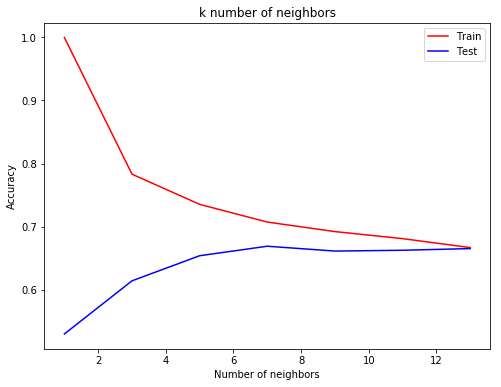

In [29]:
fig,axes = plt.subplots(figsize=(8,6))

axes.plot(n_time['k'], n_time['training score'], 'r',label='Train')
axes.set_xlabel('Number of neighbors')
axes.set_ylabel('Accuracy')
axes.plot(n_time['k'], n_time['test score'], 'b',label='Test')
axes.legend()
axes.set_title('k number of neighbors')

### Let's scale the data

In [30]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,MaxAbsScaler

scaler_names=['MinMax Scaler','Standard Scaler','MaxAbs Scaler']

scalers=[MinMaxScaler(),StandardScaler(),MaxAbsScaler()]

In [31]:
scaler_t=pd.DataFrame()
for sn,sc in zip(scaler_names,scalers):
    sc.fit(X_train)#fit your scaler on training dataset
    X_train_scaled=sc.transform(X_train)#transform training data with the sclaer
    X_test_scaled=sc.transform(X_test)#transform the test data with the scaler
    n_time=knn_k(X_train_scaled,y_train,X_test_scaled,y_test,15)
    n_time['scaler']=sn
    scaler_t=scaler_t.append(n_time)  

In [32]:
scaler_t

,k,training time,predicting time,test score,training score,scaler
0,1,0.004986,0.015956,0.493898,0.999955,MinMax Scaler
1,3,0.002993,0.018948,0.698171,0.833945,MinMax Scaler
2,5,0.002992,0.019946,0.706370,0.799538,MinMax Scaler
3,7,0.002992,0.022941,0.701831,0.769893,MinMax Scaler
4,9,0.002960,0.023936,0.684628,0.748764,MinMax Scaler
5,11,0.002993,0.024901,0.672300,0.733000,MinMax Scaler
6,13,0.002992,0.025932,0.665288,0.719244,MinMax Scaler
0,1,0.002961,0.017961,0.561691,0.999955,Standard Scaler
1,3,0.002958,0.020972,0.706781,0.846271,Standard Scaler
2,5,0.002962,0.023966,0.729297,0.801202,Standard Scaler


In [ ]:
scaler_t['test score'][scaler_t['scaler']=='MinMax Scaler']

<IPython.core.display.Javascript object>


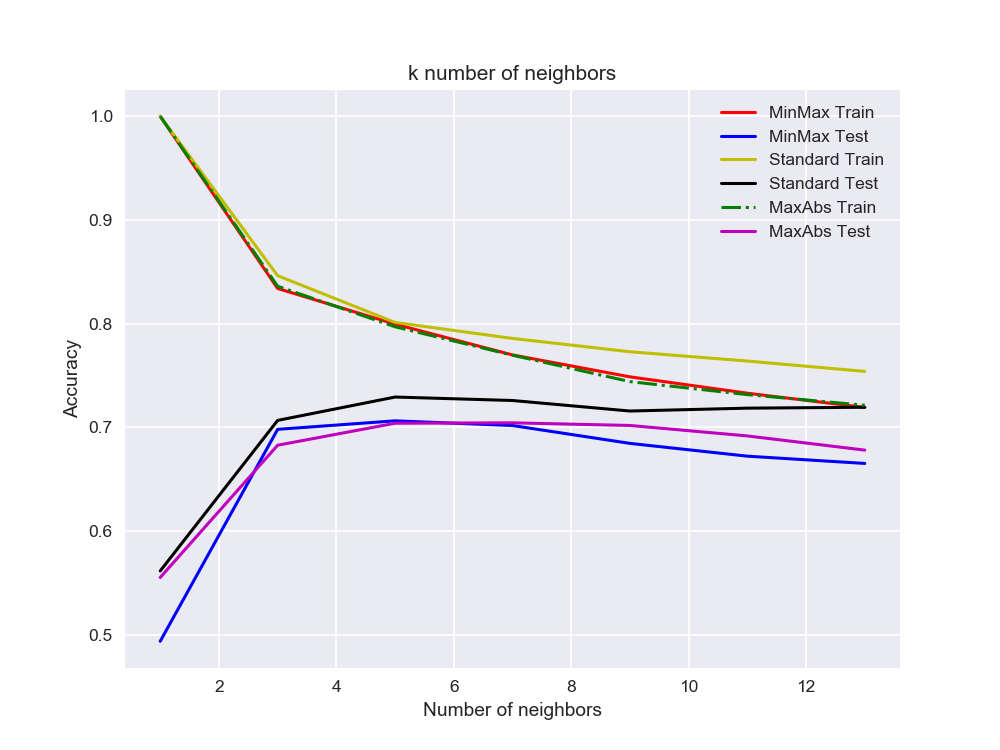

In [45]:
fig,axes = plt.subplots(figsize=(8,6))

axes.plot(scaler_t.k[scaler_t['scaler']=='MinMax Scaler'], scaler_t['training score'][scaler_t['scaler']=='MinMax Scaler'], 'r',label='MinMax Train')
axes.plot(scaler_t.k[scaler_t['scaler']=='MinMax Scaler'], scaler_t['test score'][scaler_t['scaler']=='MinMax Scaler'], 'b',label='MinMax Test')

axes.plot(scaler_t.k[scaler_t['scaler']=='Standard Scaler'], scaler_t['training score'][scaler_t['scaler']=='Standard Scaler'], 'y',label='Standard Train')
axes.plot(scaler_t.k[scaler_t['scaler']=='Standard Scaler'], scaler_t['test score'][scaler_t['scaler']=='Standard Scaler'], 'k',label='Standard Test')

axes.plot(scaler_t.k[scaler_t['scaler']=='MaxAbs Scaler'], scaler_t['training score'][scaler_t['scaler']=='MaxAbs Scaler'], 'g-.',label='MaxAbs Train')
axes.plot(scaler_t.k[scaler_t['scaler']=='MaxAbs Scaler'], scaler_t['test score'][scaler_t['scaler']=='MaxAbs Scaler'], 'm',label='MaxAbs Test')

axes.set_xlabel('Number of neighbors')
axes.set_ylabel('Accuracy')
axes.legend()
axes.set_title('k number of neighbors')

## Linear Models



### Split into train, test

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.8, random_state=0)

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Fit linear regression model

In [34]:
clf=LinearRegression()
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Check the R square of the regression model on training data

In [35]:
clf.score(X_train,y_train)

0.7191195545952247

### Check the R square of the regression model on test data

In [36]:
clf.score(X_test,y_test)

0.7023788187250837

### Display the intercept and coefficients 

In [37]:
coef = '\n'.join(["{}'s coefficient is {:.2f}".format(name,coe)
                  for name,coe in zip(X.columns,clf.coef_)])

In [38]:
print('The intercept is {0:.2f} \n\nand coefficient vector is \n\n{1}'.format(clf.intercept_,coef))

The intercept is -1792887.90 

and coefficient vector is 

BEDS's coefficient is -30873.65
BATHS's coefficient is 40035.55
SQUARE FEET's coefficient is 187.35
LOT SIZE's coefficient is 0.46
YEAR BUILT's coefficient is -1435.69
HOA/MONTH's coefficient is 152.80
yearRemodled's coefficient is 2319.53
walkscore's coefficient is 460.80
bikescore's coefficient is 334.58
transitscore's coefficient is -1402.11


In [39]:
clf

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
import statsmodels.formula.api as sm

In [43]:
X = np.append(arr = np.ones((50,1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

ValueError: all the input array dimensions except for the concatenation axis must match exactly

### Ridge regression

In [51]:
from sklearn.linear_model import Ridge

#X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.8, random_state=0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Ridge regression R2 score on training data is: {}'.format(linridge.score(X_train, y_train)))
print('Ridge regression R2 score on test data is: {}'.format(linridge.score(X_test,y_test)))

Ridge regression R2 score on training data is: 0.7191106202988757
Ridge regression R2 score on test data is: 0.7024949143964834


In [52]:
linridge

Ridge(alpha=20.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

#### Ridge regression with feature normalization

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.8, random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 229561.31899826298
ridge regression linear model coeff:
[  62263.01673341  488234.99542398  801551.62485665   48144.90923284
 -197429.65588421   70076.29823112   83300.61786937   40693.05122095
  -26303.36645369 -102287.27128392]
R-squared score (training): 0.601
R-squared score (test): 0.610
Number of non-zero features: 10


#### Ridge regression with regularization parameter: alpha

In [54]:
print('Ridge regression: effect of alpha regularization parameter\n')
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.8, random_state=0)

for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train, y_train)
    r2_train = linridge.score(X_train, y_train)
    r2_test = linridge.score(X_test, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:}\nnum abs(coeff) > 1.0: {}, \
           r-squared training: {:.4f}, r-squared test: {:.4f}\n'
          .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0
num abs(coeff) > 1.0: 9,            r-squared training: 0.7191, r-squared test: 0.7024

Alpha = 1
num abs(coeff) > 1.0: 9,            r-squared training: 0.7191, r-squared test: 0.7024

Alpha = 10
num abs(coeff) > 1.0: 9,            r-squared training: 0.7191, r-squared test: 0.7024

Alpha = 20
num abs(coeff) > 1.0: 9,            r-squared training: 0.7191, r-squared test: 0.7025

Alpha = 50
num abs(coeff) > 1.0: 9,            r-squared training: 0.7191, r-squared test: 0.7026

Alpha = 100
num abs(coeff) > 1.0: 9,            r-squared training: 0.7189, r-squared test: 0.7027

Alpha = 1000
num abs(coeff) > 1.0: 9,            r-squared training: 0.7156, r-squared test: 0.7006



### Lasso regression

In [55]:
from sklearn.linear_model import Lasso

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.8, random_state=0)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train, y_train)

print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test, y_test)))


lasso regression linear model intercept: -1793098.25547232
lasso regression linear model coeff:
[-3.08680545e+04  4.00232979e+04  1.87353233e+02  4.60816272e-01
 -1.43565331e+03  1.52817873e+02  2.31959268e+03  4.60845078e+02
  3.34563917e+02 -1.40207125e+03]
Non-zero features: 10
R-squared score (training): 0.719
R-squared score (test): 0.702



#### Lasso regression with regularization parameter: alpha

In [56]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.8, random_state=0)
for alpha in [0.1,0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train, y_train)
    r2_train = linlasso.score(X_train, y_train)
    r2_test = linlasso.score(X_test, y_test)
    
    print('Alpha = {:}\nFeatures kept: {}, r-squared training: {:.4f}, \
r-squared test: {:.4f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.1
Features kept: 10, r-squared training: 0.7191, r-squared test: 0.7024

Alpha = 0.5
Features kept: 10, r-squared training: 0.7191, r-squared test: 0.7024

Alpha = 1
Features kept: 10, r-squared training: 0.7191, r-squared test: 0.7024

Alpha = 2
Features kept: 10, r-squared training: 0.7191, r-squared test: 0.7024

Alpha = 3
Features kept: 10, r-squared training: 0.7191, r-squared test: 0.7024

Alpha = 5
Features kept: 10, r-squared training: 0.7191, r-squared test: 0.7024

Alpha = 10
Features kept: 10, r-squared training: 0.7191, r-squared test: 0.7024

Alpha = 20
Features kept: 10, r-squared training: 0.7191, r-squared test: 0.7024

Alpha = 50
Features kept: 10, r-squared training: 0.7191, r-squared test: 0.7024



### Polynomial regression

In [57]:
from sklearn.preprocessing import PolynomialFeatures

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.8, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2,interaction_only =True)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_poly, y,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [-3.08736494e+04  4.00355537e+04  1.87349820e+02  4.60817075e-01
 -1.43569464e+03  1.52797671e+02  2.31953061e+03  4.60802863e+02
  3.34582585e+02 -1.40210909e+03]
linear model intercept (b): -1792887.9021806696
R-squared score (training): 0.719
R-squared score (test): 0.702

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[ 6.64846376e-02 -1.40210207e+06 -1.93932946e+06 -2.26040874e+02
 -7.13146865e+02  3.31812151e+04 -7.29830857e+04  2.44932754e+04
  6.15730804e+04 -2.08929482e+05  2.21068907e+04 -2.05318633e+04
 -7.48875099e+00  2.25513762e-01 -4.56268013e+02  4.40656486e+01
  1.19153202e+03  5.53863213e+02 -5.59144122e+02 -1.10744937e+03
  2.86818435e+01 -2.70900616e+00  2.64273680e+02 -2.75680174e+02
  7.73390012e+02  4.37054255e+02 -1.96235846e+02 -1.15970145e+03
  1.38615430e-03  1.33481467e-01  1.24706331e-02 -5.95591078e-03
 -1.89337854e+00  1.57257283e+00  2.13904503e+

In [58]:
len(X.columns)

10

In [59]:
x_cols_in =['x{}'.format(i) for i in range(0,len(X.columns))]

In [60]:
x_cols_in

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']

In [61]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x7 x8',
 'x7 x9',
 'x8 x9']

In [62]:
poly_names = poly.get_feature_names()
for x,n in zip(x_cols_in,X.columns):
    poly_names = [s.replace(x,n) for s in poly_names]

In [63]:
poly_names

['1',
 'BEDS',
 'BATHS',
 'SQUARE FEET',
 'LOT SIZE',
 'YEAR BUILT',
 'HOA/MONTH',
 'yearRemodled',
 'walkscore',
 'bikescore',
 'transitscore',
 'BEDS BATHS',
 'BEDS SQUARE FEET',
 'BEDS LOT SIZE',
 'BEDS YEAR BUILT',
 'BEDS HOA/MONTH',
 'BEDS yearRemodled',
 'BEDS walkscore',
 'BEDS bikescore',
 'BEDS transitscore',
 'BATHS SQUARE FEET',
 'BATHS LOT SIZE',
 'BATHS YEAR BUILT',
 'BATHS HOA/MONTH',
 'BATHS yearRemodled',
 'BATHS walkscore',
 'BATHS bikescore',
 'BATHS transitscore',
 'SQUARE FEET LOT SIZE',
 'SQUARE FEET YEAR BUILT',
 'SQUARE FEET HOA/MONTH',
 'SQUARE FEET yearRemodled',
 'SQUARE FEET walkscore',
 'SQUARE FEET bikescore',
 'SQUARE FEET transitscore',
 'LOT SIZE YEAR BUILT',
 'LOT SIZE HOA/MONTH',
 'LOT SIZE yearRemodled',
 'LOT SIZE walkscore',
 'LOT SIZE bikescore',
 'LOT SIZE transitscore',
 'YEAR BUILT HOA/MONTH',
 'YEAR BUILT yearRemodled',
 'YEAR BUILT walkscore',
 'YEAR BUILT bikescore',
 'YEAR BUILT transitscore',
 'HOA/MONTH yearRemodled',
 'HOA/MONTH walkscore

In [ ]:
len(linreg.coef_)

In [ ]:
len(poly_names)

In [64]:
['coefficient for {} is {:.2f}'.format(n,c) for n,c in zip(poly_names,linreg.coef_)]

['coefficient for 1 is 0.00',
 'coefficient for BEDS is -36841.66',
 'coefficient for BATHS is -20595.92',
 'coefficient for SQUARE FEET is -2056.54',
 'coefficient for LOT SIZE is -686.16',
 'coefficient for YEAR BUILT is 18971.55',
 'coefficient for HOA/MONTH is -65715.23',
 'coefficient for yearRemodled is 14429.04',
 'coefficient for walkscore is 27478.09',
 'coefficient for bikescore is -161374.97',
 'coefficient for transitscore is 26068.36',
 'coefficient for BEDS BATHS is -19657.52',
 'coefficient for BEDS SQUARE FEET is -8.05',
 'coefficient for BEDS LOT SIZE is 0.07',
 'coefficient for BEDS YEAR BUILT is -410.95',
 'coefficient for BEDS HOA/MONTH is 55.11',
 'coefficient for BEDS yearRemodled is 465.96',
 'coefficient for BEDS walkscore is 559.86',
 'coefficient for BEDS bikescore is -597.91',
 'coefficient for BEDS transitscore is -1153.37',
 'coefficient for BATHS SQUARE FEET is 28.83',
 'coefficient for BATHS LOT SIZE is -2.81',
 'coefficient for BATHS YEAR BUILT is 341.59

## Linear models for classification

### Logistic regression

#### Logistic regression for binary classification on fruits dataset using height, width features (positive class: apple, negative class: others)

In [ ]:
from sklearn.linear_model import LogisticRegression

labeled_images = pd.read_csv('digits_train.csv')

#select images features from the second column to the last column, and only the first 2000 smaples(rows).
X = labeled_images.iloc[:4000,1:]
#select the first column which is the label, or the digit, and only the first 2000 smaples(rows).
y = labeled_images.iloc[:4000,:1].squeeze()# with .squeeze(), the pandas one column dataframe is turned into a series 
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.8, random_state=0)

clf = LogisticRegression(C=100).fit(X_train, y_train)
print('Logistic regression R-squared score (training): {:.3f}'
     .format(clf.score(X_train, y_train)))
print('Logistic regression R-squared score (test): {:.3f}'
     .format(clf.score(X_test, y_test)))

In [ ]:
clf

#### Logistic regression regularization: C parameter

In [ ]:
for this_C in [0.01,0.1, 1,10,50, 100]:
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    print('Logistic regression C={0} R-squared score (training): {1:.3f}'
     .format(this_C,clf.score(X_train, y_train)))
    print('Logistic regression C={0} R-squared score (test): {1:.3f}'
     .format(this_C, clf.score(X_test, y_test)))

### Let's Try PCA n=[30,50,70]

In [ ]:
pca_t=pd.DataFrame()

for n_c in [30,50,70]:
    pca=PCA(n_components=n_c, whiten=True)
    pca.fit(X_train)
    X_train_pca=pca.transform(X_train) #pca transform on training data
    X_test_pca=pca.transform(X_test) #you have to do the same transformation on test data
    print('{} number of PCA componets..................................................'.format(n_c))
    for this_C in [0.01,0.1, 1,10,50, 100]:
        clf = LogisticRegression(C=this_C).fit(X_train_pca, y_train)
        print('Logistic regression C={0} R-squared score (training): {1:.3f}'
         .format(this_C,clf.score(X_train_pca, y_train)))
        print('Logistic regression C={0} R-squared score (test): {1:.3f}'
         .format(this_C, clf.score(X_test_pca, y_test)))

### Support Vector Machines
#### Linear Support Vector Machine

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear').fit(X_train, y_train)

print('Training score: {:.3f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.3f}'.format(clf.score(X_test, y_test)))

In [ ]:
X_train.shape

In [ ]:
y_train.shape

#### Linear Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC().fit(X_train, y_train)
print('Training score: {:.3f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.3f}'.format(clf.score(X_test, y_test)))

#### Kernelized SVC

Default SVC is with kernel='rbf'

In [ ]:
from sklearn.svm import SVC

clf = SVC().fit(X_train, y_train)

print('Training score: {:.3f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.3f}'.format(clf.score(X_test, y_test)))

Use kernel='poly', degree=2

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='poly',degree=2).fit(X_train, y_train)

print('Training score: {:.3f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.3f}'.format(clf.score(X_test, y_test)))

#### Let's try scalers

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
clf = SVC(kernel = 'linear').fit(X_train_scaled, y_train)

print('Linear SVC Training score: {:.3f}'.format(clf.score(X_train_scaled, y_train)))
print('Linear SVC Test score: {:.3f}'.format(clf.score(X_test_scaled, y_test)))

clf = SVC().fit(X_train_scaled, y_train)
print('RBF SVC Training score: {:.3f}'.format(clf.score(X_train_scaled, y_train)))
print('RBF SVC Test score: {:.3f}'.format(clf.score(X_test_scaled, y_test)))

clf = SVC(kernel='poly',degree=2).fit(X_train_scaled, y_train)
print('Poly SVC Training score: {:.3f}'.format(clf.score(X_train_scaled, y_train)))
print('Poly SVC Test score: {:.3f}'.format(clf.score(X_test_scaled, y_test)))


#### Let's try PCA

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=35, whiten=True)
pca.fit(X_train)
X_train_pca=pca.transform(X_train) #pca transform on training data
X_test_pca=pca.transform(X_test) #you have to do the same transformation on test data

In [ ]:
clf = SVC(kernel = 'linear').fit(X_train_pca, y_train)

print('Linear SVC Training score: {:.3f}'.format(clf.score(X_train_pca, y_train)))
print('Linear SVC Test score: {:.3f}'.format(clf.score(X_test_pca, y_test)))

clf = SVC().fit(X_train_pca, y_train)
print('RBF SVC Training score: {:.3f}'.format(clf.score(X_train_pca, y_train)))
print('RBF SVC Test score: {:.3f}'.format(clf.score(X_test_pca, y_test)))

clf = SVC(kernel='poly',degree=2).fit(X_train_pca, y_train)
print('Poly SVC Training score: {:.3f}'.format(clf.score(X_train_pca, y_train)))
print('Poly SVC Test score: {:.3f}'.format(clf.score(X_test_pca, y_test)))

#### Support Vector Machine with RBF kernel: using both C and gamma parameter 

In [ ]:
for this_gamma in [0.01,0.02,0.03,0.1,0.2, 1, 5]:
    
    for this_C in [0.01,0.1, 1,5,10, 15]:
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train_pca, y_train)
        print('gamma is {0}, and c is {1}'.format(this_gamma,this_C))
        print('Training score: {:.3f}'.format(clf.score(X_train_pca, y_train)))
        print('Test score: {:.3f}'.format(clf.score(X_test_pca, y_test)))
        print('\n')